In [1]:
from IPython.core.pylabtools import figsize
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import multivariate_normal
import numpy as np

from PIL import Image
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

#### reading image

In [2]:
im = Image.open("./img_data/img1.jpg")
data = np.array(im)

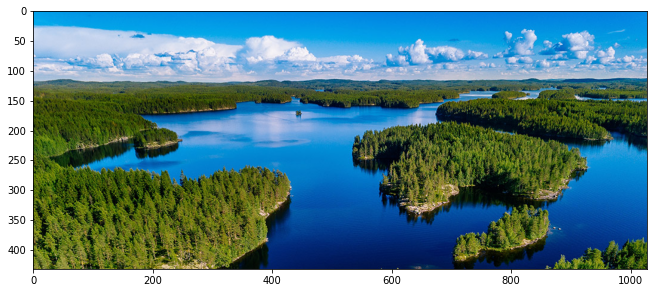

In [3]:
figsize(11, 30)
plt.imshow(data)
plt.show()

#### visualizing image by all three channels

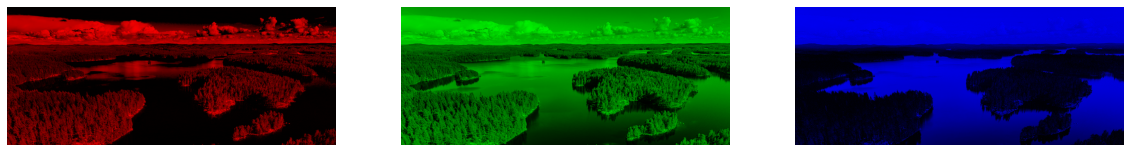

In [4]:
figsize(20, 3)
figure, plots = plt.subplots(ncols=3, nrows=1)

for i, subplot in zip(range(3), plots):
    temp = np.zeros(data.shape, dtype='uint8')
    temp[:,:,i] = data[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

#### histogram by each channels

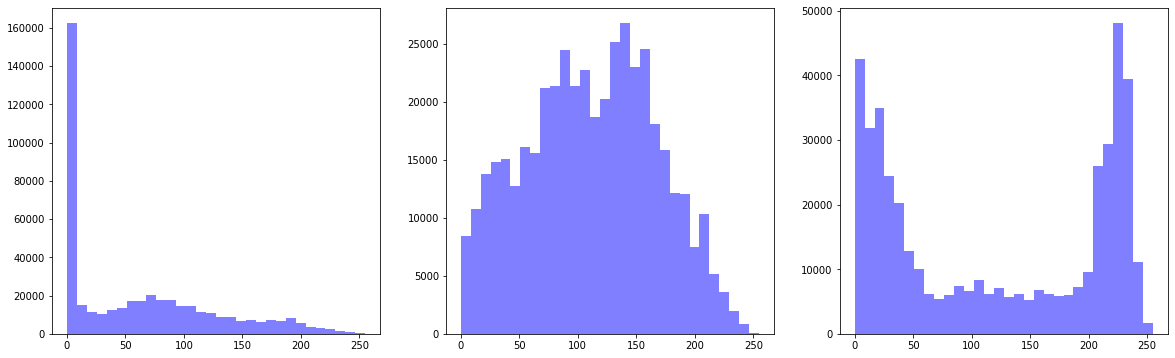

In [5]:
figsize(20, 6)
figure, plots = plt.subplots(ncols=3, nrows=1)

for i, subplot in zip(range(3), plots):
    temp = data[:,:,i].flatten()
    n, bins, patches = subplot.hist(temp, 30, facecolor='blue', alpha=0.5)
plt.show()

In [6]:
h, w, c = data.shape

# Training GMM model for Number of components N

#### prepare training data

In [7]:
X = np.array(im.getdata())
#(data.reshape(h*w, c)-X).shape
print(X.shape)

(444096, 3)


#### define number of component

In [8]:
N = 3

In [9]:
gmm = GaussianMixture(n_components=N)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

# Image analysis

#### visualize each group

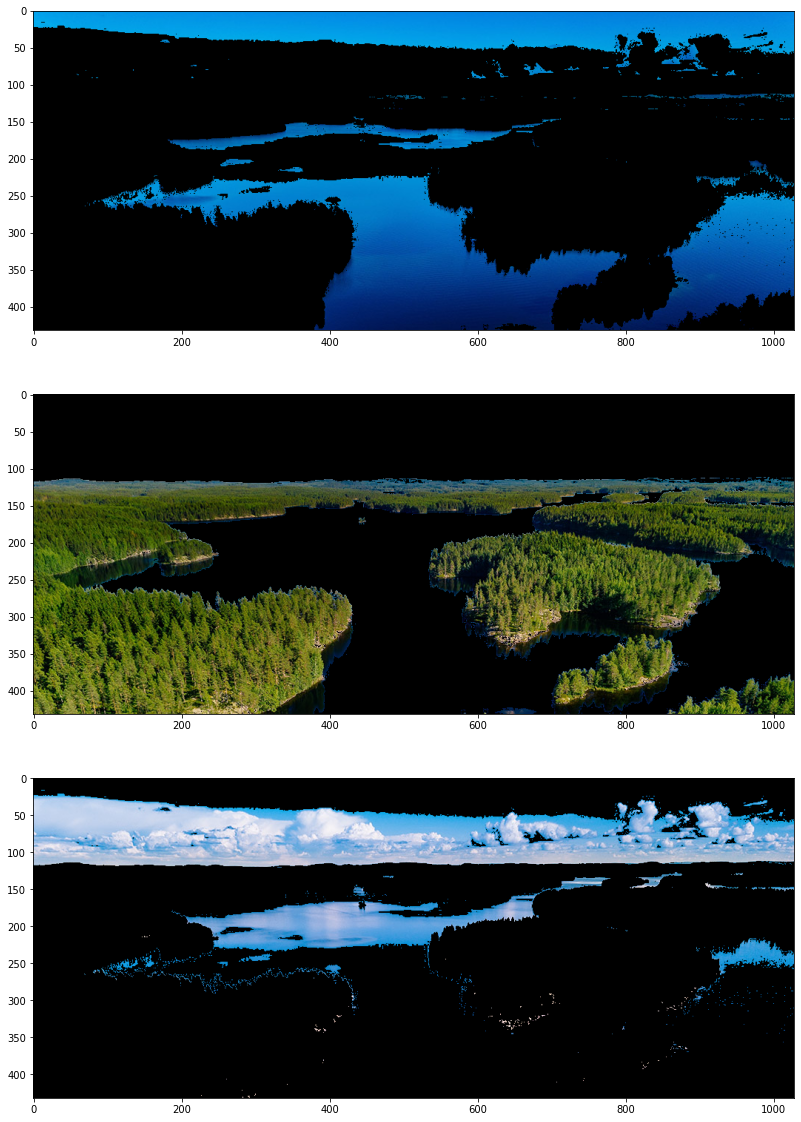

In [10]:
groups = gmm.predict(X)
figsize(15, 20)
figure, plots = plt.subplots(ncols=1, nrows=N)

for i, subplot in zip(range(N), plots):
    temp = (X * ((groups==i)*1).reshape(-1,1)).reshape((h, w, c))
    subplot.imshow(temp)
plt.show()

# Test on new image

In [17]:
im2 = Image.open("./img_data/img4.jpg")
data2 = np.array(im2)
h2, w2, c2 = data2.shape

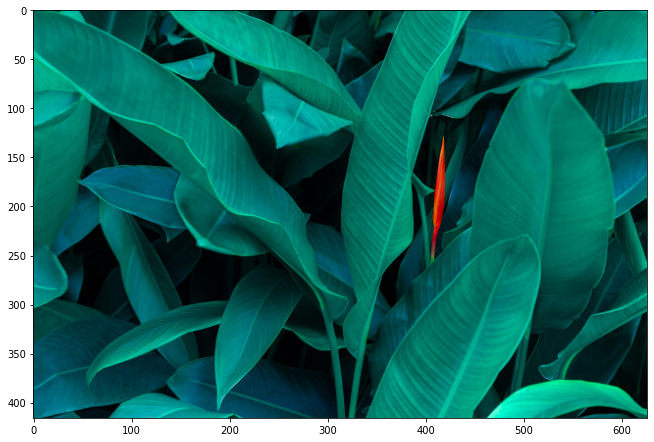

In [18]:
figsize(11, 30)
plt.imshow(data2)
plt.show()

In [19]:
X2 = np.array(im2.getdata())

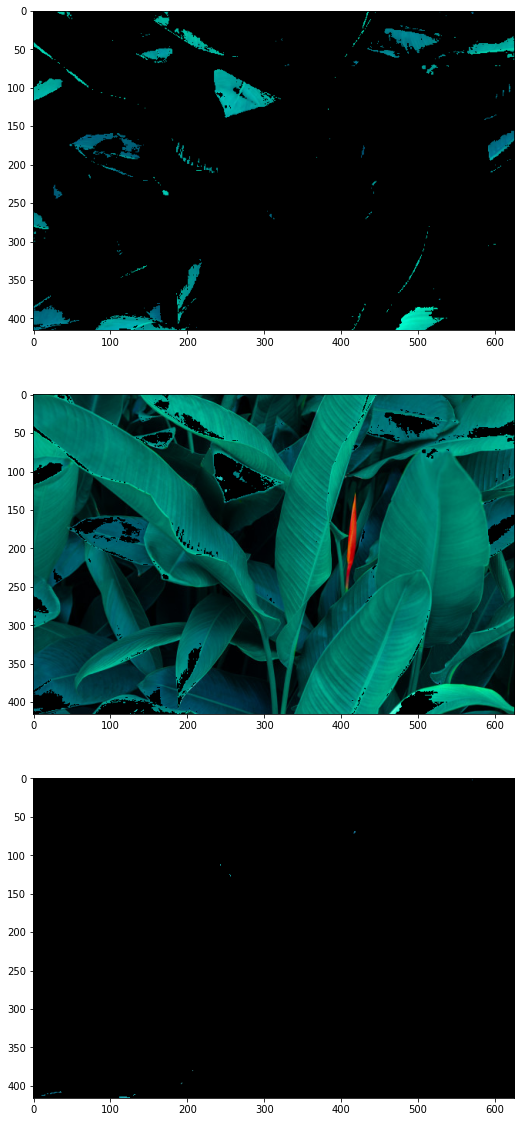

In [20]:
groups = gmm.predict(X2)
figsize(15, 20)
figure, plots = plt.subplots(ncols=1, nrows=N)

for i, subplot in zip(range(N), plots):
    temp = (X2 * ((groups==i)*1).reshape(-1,1)).reshape((h2, w2, c2))
    subplot.imshow(temp)
plt.show()